<a href="https://colab.research.google.com/github/OSCARCASTRILLON2025/Clase-Sistemas-Avanzados-de-Producci-n/blob/main/Taller_Bici_al_Trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

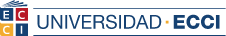
# **SISTEMAS AVANZADOS DE PRODUCCIÓN CON PYTHON**

# **Taller 2 (2h): Bici al trabajo 2026**

La operadora de bicicletas públicas quiere lanzar el programa Bici al Trabajo 2026. La meta interna es garantizar al menos 4.500 viajes diarios en días laborales sin deteriorar la experiencia del usuario. Para decidir presupuesto (más estaciones, reubicación y personal), piden un análisis exploratorio riguroso con el histórico Capital Bikeshare 2011–2012 (day.csv).

Tu misión es cuantificar cómo el clima y la estacionalidad afectan la demanda diaria (cnt), verificar supuestos estadísticos básicos y comprobar con evidencia si hoy, bajo condiciones típicas, la media diaria en días laborales alcanza (o no) el umbral de 4.500. Además, deberás comunicar una medida robusta del uso típico (mediana) para reportes públicos, donde la distribución puede ser asimétrica.




# **Instrucciones:**

### **Instrucciones para el Taller: "Bici al Trabajo 2026"**

**Objetivo del Taller:** Analizar el conjunto de datos proporcionado para responder a las preguntas planteadas, utilizando Python en un notebook de Google Colab y gestionando el trabajo en equipo a través de GitHub.

**Fecha de Entrega:** Viernes, 29 de agosto, hasta las 11:59 p.m.

  *No hacer cambios al enunciado.
  *Un solo repositorio por grupo.
  *Elijan un líder y repartan responsabilidades.
  *Pueden trabajar en Google Colab por separado y al final unir los segmentos.

---

#### **Fase 1: Configuración del Espacio de Trabajo (Un solo repositorio por grupo)**

El grupo debe designar a **un responsable (líder)** para realizar los siguientes pasos:

1.  **Crear el Repositorio en GitHub (Líder) :**
    * Ve a GitHub y crea un nuevo repositorio con el nombre exacto: `Bici-al-Trabajo-2026`, solo es necesario un repositorio, para ello seleccionen un líder de grupo.
    * Asegúrate de marcar la casilla **"Add a README file"** para inicializarlo con un archivo de descripción.

2.  **Completar el Archivo `README.md`:**
    * Dentro del repositorio, haz clic en el archivo `README.md` y luego en el ícono del lápiz para editarlo.
    * Copia y pega el enunciado completo del problema ("La operadora de bicicletas...") en este archivo.
    * Guarda los cambios (haz "Commit changes").

3.  **Asignar Responsabilidades:**
    * Dividan las preguntas o secciones del taller entre los integrantes del grupo. Es crucial que cada miembro sepa exactamente de qué parte es responsable, para ello abran el notebook de referencia para ver todas las preguntas y secciones que deben desarrollar:
    * **Recomendación:** Anoten esta división de tareas en el archivo `README.md` para que todos tengan claridad.

4.  **Crear el Notebook del Taller:**
    * Utilizando el archivo Taller2.ipynb abralo en Colab, nombren el archivo ahora como `Taller_Bici_al_Trabajo.ipynb` y subalo a su repositorio.

5.  **Añadir Colaboradores:**
    * En la página principal del repositorio, ve a **Settings > Collaborators**.
    * Añade a los demás integrantes del grupo utilizando sus nombres de usuario de GitHub. Ellos deberán aceptar la invitación que les llegará por correo o en el simbolo de sobre que esta en la pagína principal de github.
    * Protege main (Settings → Branches → Add rule):

5.  **Guardar los Cambios en GitHub (¡Paso Clave!):**
    * Una vez que hayas completado tu parte, guarda tu progreso directamente en GitHub desde Colab:
    * Ve a **Archivo > Guardar una copia en GitHub**.
    * Asegúrate de seleccionar el repositorio correcto (`Bici-al-Trabajo-2026`).
    * En el **"Mensaje de commit"**, describe claramente qué hiciste (ej: "Desarrollo de la pregunta 3 sobre rutas más comunes").
    * Haz clic en **Aceptar**.

In [ ]:
#CARGANDO LOS DATOS
# --- Setup reproducible (Colab-friendly) ---
!pip -q install ucimlrepo -q


In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from ucimlrepo import fetch_ucirepo

rng = np.random.default_rng(123)

# 1. Carga el dataset completo desde UCI
bike = fetch_ucirepo(id=275)  # Bike Sharing Dataset

# 2. Extrae las características (X) y el objetivo (y)
df = bike.data.original.copy()


# 3. Limpieza mínima y orden
df["dteday"] = pd.to_datetime(df["dteday"])
df = df.sort_values("dteday").reset_index(drop=True)

print(df.head())

# 4. Selección de columnas (incluye casual/registered)
df = df[['season','yr','mnth','holiday','weekday','workingday',
         'weathersit','temp','hum','windspeed','casual','registered','cnt','dteday']]

print(df.head(), df.columns.tolist())

   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1       24 2011-01-01       1   0     1  23        0        6           0   
2       23 2011-01-01       1   0     1  22        0        6           0   
3       22 2011-01-01       1   0     1  21        0        6           0   
4       21 2011-01-01       1   0     1  20        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81     0.0000       3          13   16  
1           2  0.46  0.4545  0.88     0.2985      15          24   39  
2           2  0.40  0.4091  0.94     0.2239      11          17   28  
3           2  0.40  0.4091  0.87     0.1940       3          31   34  
4           2  0.40  0.4091  0.87     0.2537      11          25   36  
   season  yr  mnth  holiday  weekday  workingday  weathersit  temp   hum  \
0       1   0     1        0

## **PREGUNTA 1**
¿La distribución de cnt puede tratarse como aproximadamente normal, realiza el histrograma y el gráfico Q-Q?

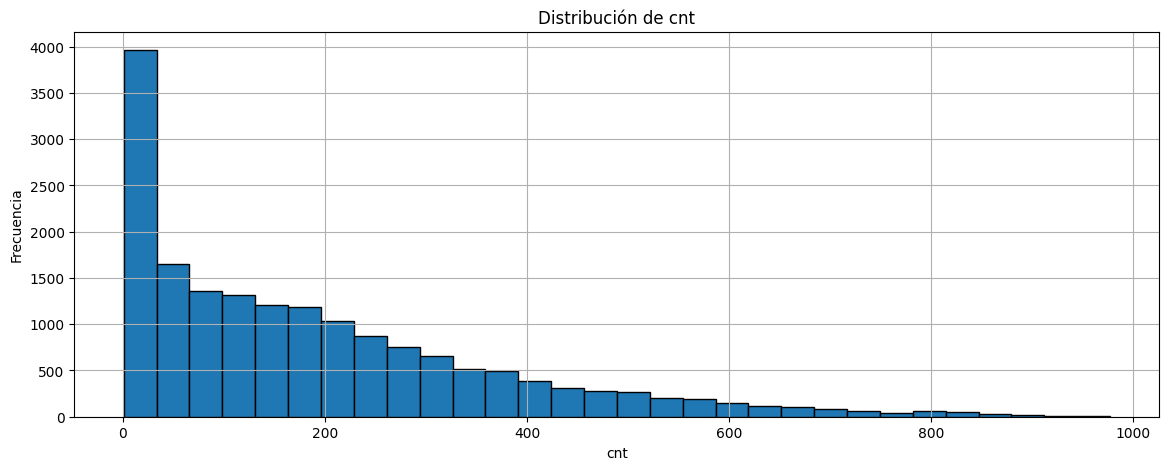

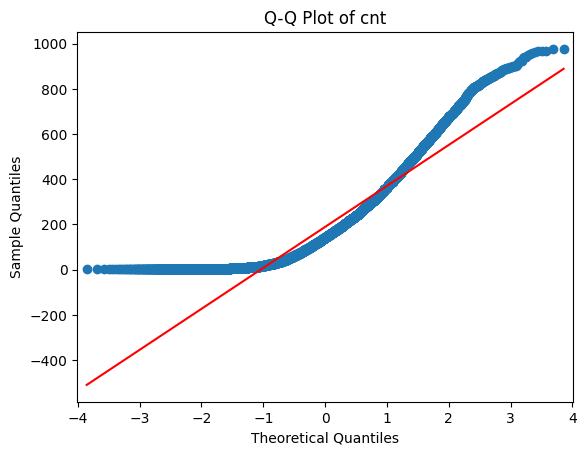

In [ ]:
def histograma(data):
    """
    Genera un histograma de los datos.

    Args:
        data (pd.Series): Los datos para graficar.
    """
    plt.hist(data, bins=30, edgecolor='black')
    plt.title('Distribución de cnt')
    plt.xlabel('cnt')
    plt.ylabel('Frecuencia')
    plt.grid(True)

# 1. Visualización
plt.figure(figsize=(14, 5))
histograma(df['cnt'])
plt.show()
import statsmodels.api as sm

# Create the Q-Q plot
fig = sm.qqplot(df['cnt'], line='s')
plt.title('Q-Q Plot of cnt')
plt.show()

**Interpretación pregunta 1**

El histograma es una representación visual que divide los datos en intervalos (o "bins") y cuenta cuántos puntos de datos caen dentro de cada intervalo. En este caso, el histograma tiene:

Ejes:

El eje horizontal (x) muestra los valores de cnt.

El eje vertical (y) muestra la frecuencia (o cantidad de veces) que ocurre cada valor o intervalo de valores.

Si la distribución es aproximadamente normal, el histograma debería tener una forma de campana (una distribución simétrica alrededor de la media), aunque no necesariamente perfecta.
El gráfico Q-Q compara los cuantiles (percentiles) de tus datos con los cuantiles de una distribución normal.
Si los puntos del gráfico Q-Q caen aproximadamente sobre una línea recta (la línea line='s' indica una línea de referencia de la normal), entonces los datos siguen una distribución normal.

Si los puntos se desvían significativamente de esta línea, podría indicar que los datos no siguen una distribución normal (por ejemplo, sesgo hacia la izquierda o hacia la derecha, colas más gruesas, etc.).

Interpretación de los resultados

Histograma: Si la forma de la distribución es simétrica y tiene forma de campana, es un indicio de que los datos pueden seguir una distribución normal. Si hay asimetría (sesgo) o colas largas, puede indicar que no es normal.

Gráfico Q-Q: Si los puntos están alineados con la línea de referencia, entonces es un fuerte indicio de normalidad. Si hay desviaciones, es posible que los datos no sean normales. En particular, las colas fuera de la línea podrían sugerir que la distribución tiene colas más gruesas o más delgadas que la normal.

## **PREGUNTA 2**
¿Cómo co-varía cnt con temp, hum y windspeed? ¿La relación es lineal o solo monótona?. Ayuda: Calcular la correlación de Pearson y de Spearman.


In [ ]:
# Construimos nuevas columnas
columnas_relacion = ['cnt', 'temp', 'hum', 'windspeed']
pearson_corr = df[columnas_relacion].corr(method='pearson')['cnt']
spearman_corr = df[columnas_relacion].corr(method='spearman')['cnt']
print("Pearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)

Pearson Correlation:
 cnt          1.000000
temp         0.404772
hum         -0.322911
windspeed    0.093234
Name: cnt, dtype: float64

Spearman Correlation:
 cnt          1.000000
temp         0.423330
hum         -0.359614
windspeed    0.126629
Name: cnt, dtype: float64


### **Interpretación pregunta 2**

. Interpretación de las Correlaciones de Pearson y Spearman
Correlación de Pearson:

La correlación de Pearson mide la relación lineal entre dos variables. Los valores posibles de la correlación de Pearson están en el rango de -1 a 1:

1 significa que hay una relación lineal positiva perfecta.

-1 significa que hay una relación lineal negativa perfecta.

0 significa que no hay ninguna relación lineal.

Los valores obtenidos para las correlaciones de Pearson son los siguientes:

temp: 0.404772
Esto indica una relación moderadamente positiva entre cnt y temp. Es decir, a medida que la temperatura aumenta, el conteo (cnt) tiende a aumentar también, pero no de manera estrictamente lineal. La relación es más bien débil a moderada.

hum: -0.322911
Esto indica una relación débil negativa entre cnt y hum. Es decir, a medida que la humedad aumenta, el conteo tiende a disminuir ligeramente, pero de nuevo no de forma estrictamente lineal. La relación es débil.

windspeed: 0.093234
La correlación es muy baja, cercana a 0, lo que indica que no hay prácticamente relación lineal entre cnt y windspeed.

Correlación de Spearman:

La correlación de Spearman mide la relación monótona entre dos variables, es decir, si una variable aumenta (o disminuye) consistentemente a medida que la otra lo hace, sin que necesariamente exista una relación lineal exacta. Los valores de Spearman también están en el rango de -1 a 1, donde los valores interpretados de la misma forma que la correlación de Pearson.

temp: 0.423330
La correlación de Spearman es algo mayor que la de Pearson, lo que sugiere que, aunque la relación no sea estrictamente lineal, hay una relación monótona moderada entre cnt y temp. En otras palabras, a medida que la temperatura sube, el conteo tiende a subir de manera consistente, aunque no necesariamente en una línea recta.

hum: -0.359614
Similar a la correlación de Pearson, esta es una relación monótona negativa entre cnt y hum, donde un aumento en la humedad tiende a reducir el conteo de manera monótona, pero no necesariamente en una forma lineal.

windspeed: 0.126629
La correlación es muy baja, indicando que no hay una relación monótona significativa entre cnt y windspeed.

Resumen de la interpretación:

cnt y temp: Hay una relación moderadamente positiva tanto en términos lineales (Pearson) como monótona (Spearman), lo que sugiere que a medida que la temperatura aumenta, el conteo también tiende a aumentar, aunque no de manera estrictamente lineal.

cnt y hum: La relación entre cnt y hum es moderadamente negativa, aunque de forma débil, en ambas correlaciones. A medida que la humedad aumenta, el conteo tiende a disminuir, pero la relación no es fuerte ni estrictamente lineal ni monótona.

cnt y windspeed: No parece haber una relación significativa ni lineal ni monótona entre el conteo y la velocidad del viento, ya que ambas correlaciones son cercanas a cero.

¿Relación lineal o monótona?

Las variables temp y hum muestran relaciones moderadas (aunque débiles) en ambos tipos de correlación, lo que sugiere que la relación es monótona, pero no necesariamente lineal.

windspeed tiene correlaciones muy bajas en ambos casos, lo que indica que no hay una relación significativa ni lineal ni monótona.

En resumen, la relación entre cnt y las otras variables es monótona pero no estrictamente lineal, especialmente para la temperatura y la humedad, y la velocidad del viento no parece tener una influencia relevante.

## **PREGUNTA 3**
¿Desde qué tamaño muestral el TLC justifica intervalos y pruebas basados en normalidad para la media de cnt?

### **Respuesta pregunta 3**

## **PREGUNTA 4**
En días laborales, ¿la media de cnt ≥ 4.500? (plantea y resuelve un test de hipótesis de una muestra).

### **Interpretación pregunta 4**

## **PREGUNTA 5**
¿Cuál es un IC bootstrap para la mediana de cnt y cómo cambia tu mensaje si la distribución es sesgada?

In [ ]:
# Número de remuestreos
n_iterations = 5000
sample_size = len(df['cnt'])
medians = []

Interpretación pregunta 5